In [9]:
#import modul

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)


#import modul untuk model ML
import statsmodels.api as sm




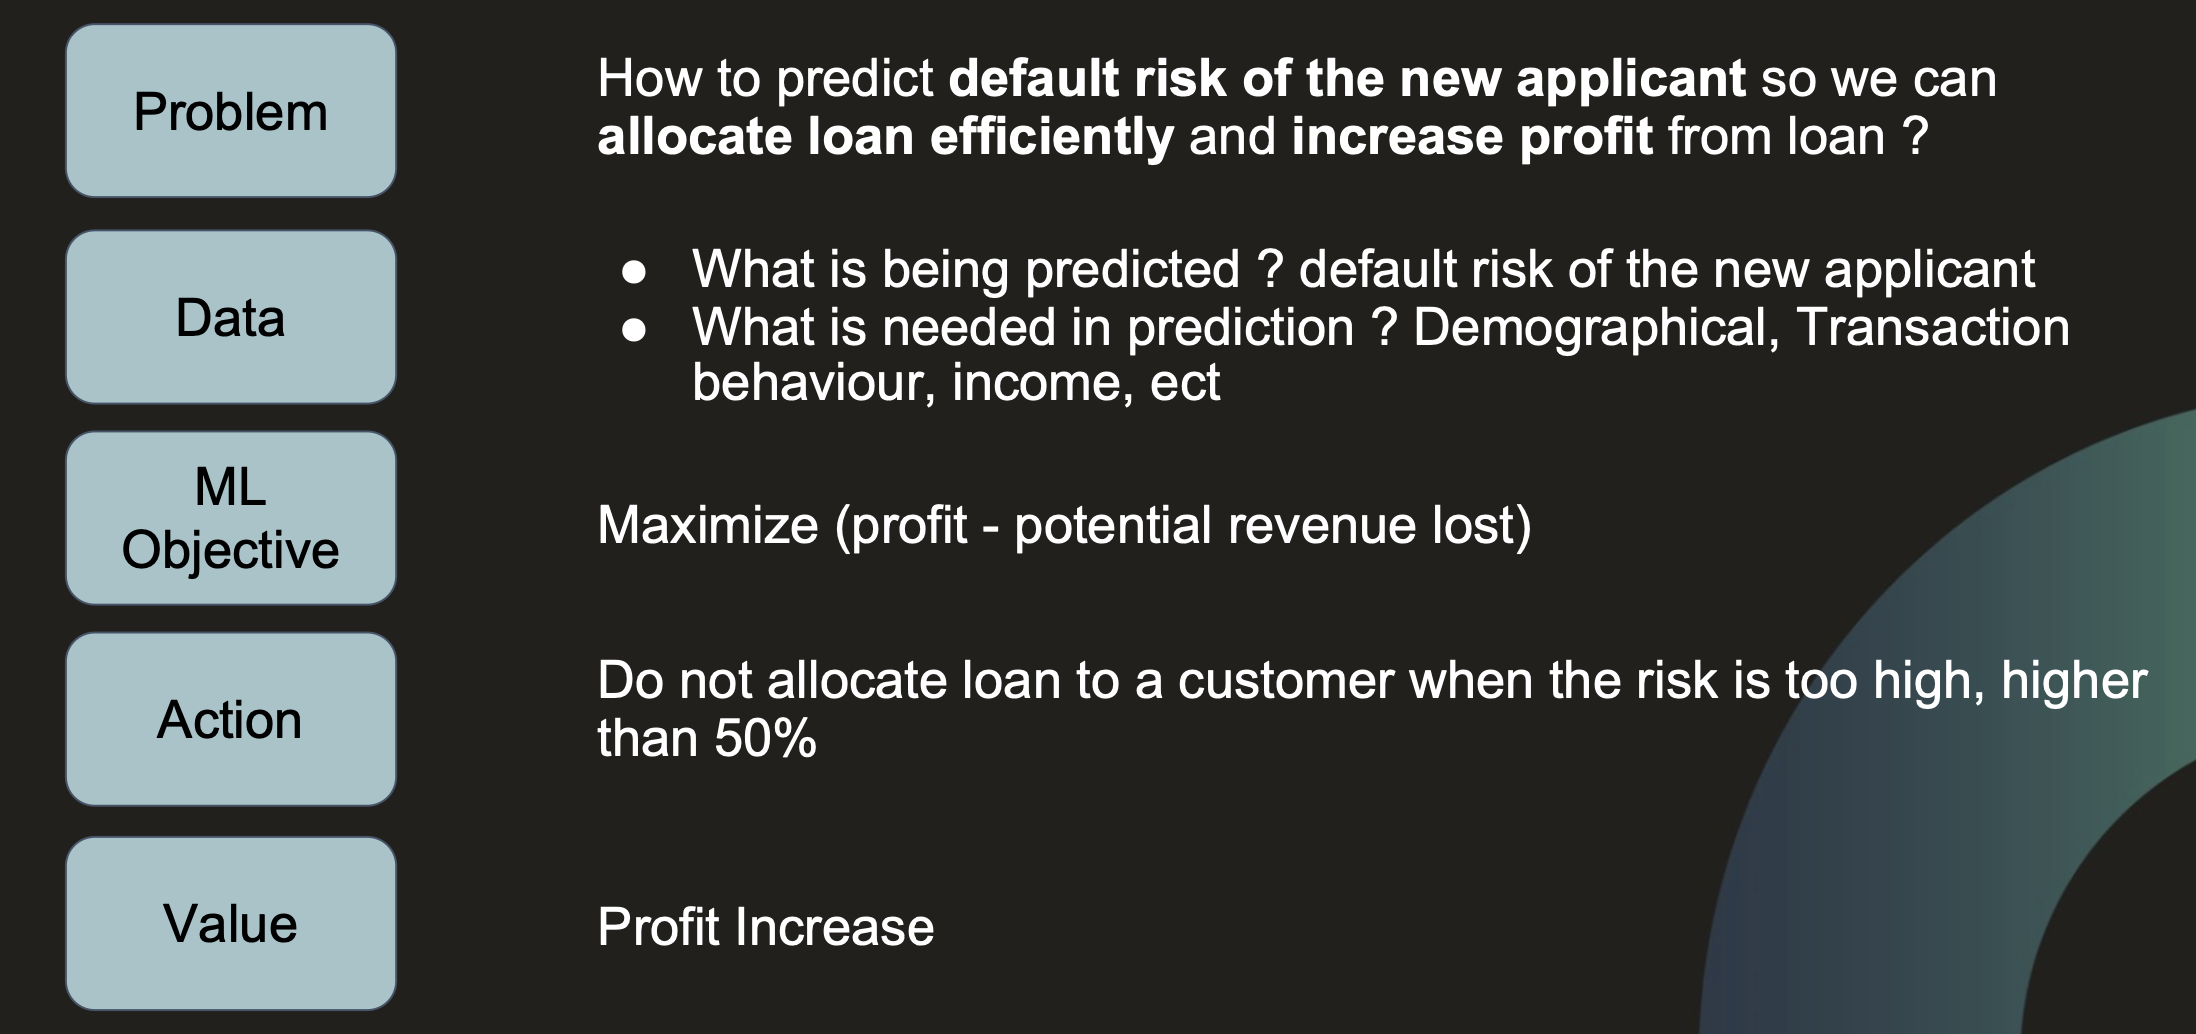

Analyze data bankloan.csv
- Build a logistics regression model
- target: default
- features: employ, debtinc, creddebt, othdebt
- Interpret the result
- Validate the model using accuracy in 20% testing data

In [11]:
df=pd.read_csv('bankloan.csv')
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


## `Data Understanding`

`age`: Usia pemohon kredit dalam tahun.

`ed`: Tingkat pendidikan pemohon.

`employ`: Lama waktu bekerja di pekerjaan saat ini atau terakhir (dalam tahun).

`address`: Lama waktu tinggal di alamat saat ini (dalam tahun).

`income`: Pendapatan tahunan pemohon (dalam ribuan dolar).

`debtinc`: Rasio total utang terhadap pendapatan (dalam persentase).

`creddebt`: Jumlah utang kartu kredit (dalam ribuan dolar).

`othdebt`: Jumlah utang lain-lain (dalam ribuan dolar).

`default`: Status gagal bayar utang sebelumnya (0 = tidak, 1 = ya).

<Axes: xlabel='income', ylabel='employ'>

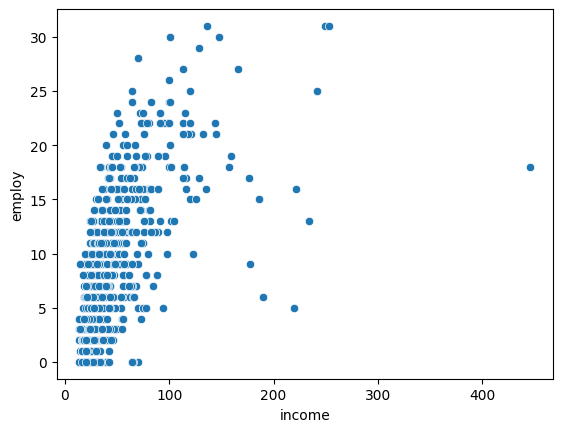

In [25]:
sns.scatterplot(data=df,x='income',y='employ')

## Define Features and Label

In [20]:
#Create Feature
X=df[['employ', 'debtinc', 'creddebt', 'othdebt']]

#target/label
y=df[['default']]

In [21]:
display(X,y)

,employ,debtinc,creddebt,othdebt
0,17,9.3,11.359392,5.008608
1,10,17.3,1.362202,4.000798
2,15,5.5,0.856075,2.168925
3,15,2.9,2.658720,0.821280
4,2,17.3,1.787436,3.056564
...,...,...,...,...
695,6,4.6,0.262062,0.979938
696,6,11.5,0.369495,2.045505
697,15,7.6,0.491264,1.940736
698,19,8.4,2.302608,4.165392


,default
0,1
1,0
2,0
3,0
4,1
...,...
695,1
696,0
697,0
698,0


## Classification Model (Logistic Regression) with Statsmodels

In [22]:
#add initial constant
X=sm.add_constant(X)
X.head()

,const,employ,debtinc,creddebt,othdebt
0,1.0,17,9.3,11.359392,5.008608
1,1.0,10,17.3,1.362202,4.000798
2,1.0,15,5.5,0.856075,2.168925
3,1.0,15,2.9,2.658720,0.821280
4,1.0,2,17.3,1.787436,3.056564


In [23]:
#create model : Proses pendefinisian model
logreg=sm.Logit(y,X)

#fit model : Proses model belajar dari data
logreg=logreg.fit()

#Show Summary
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.411165
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  700
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                            4
Date:                Fri, 20 Dec 2024   Pseudo R-squ.:                  0.2844
Time:                        11:15:04   Log-Likelihood:                -287.82
converged:                       True   LL-Null:                       -402.18
Covariance Type:            nonrobust   LLR p-value:                 2.473e-48
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2302      0.236     -5.210      0.000      -1.693      -0.767
employ        -0.2436      0.029     -8.456      0.000      -0.300      -0.187
debtinc        0.0885      0.021      4.200      0.000       0.047       0.130
creddebt       0.5041      0.083      6.094      0.000       0.342       0.666
othdebt       -0.0040      0.053     -0.076      0.940      -0.107       0.099
==============================================================================
"""

# Model Interpretation

### Employ

In [27]:
# Employ : Lama waktu bekerja di pekerjaan saat ini atau terakhir (dalam tahun).

# odd employ 
np.exp(-1.2302+(-0.2436)*1)

0.22905342630426823

$\beta_{1} = -0.2436$
`employ` : Ketika lama kerja di pekerjaan saat ini atau terakhir bertambah 1 tahun maka resiko gagal bayar turun sebesar 0.22 kali.

In [ ]:
Soal 1 buat interpretasi untuk 3 fitur lain yang digunakan

## Statistic Test

1. LLR-Test (Apakah semua fitur sekaligus(`employ`, `debtinc`, `creddebt` dan `otherdebt`) berpengaruh signifikan terhadap label ?)
    - $H_{0} : \beta_{1} = \beta_{2}= \beta_{3}= \beta_{4} = 0$ ( `employ`, `debtinc`, `creddebt` dan `otherdebt` sekaligus tidak berpengaruh signifikan terhadap `default` )
    - $H_{1} : \beta_{1} \neq 0 \cup \beta_{2} \neq 0 \cup \beta_{3} \neq 0 \cup \beta_{4} \neq 0$ ( `employ`, `debtinc`, `creddebt` dan `otherdebt` sekaligus berpengaruh signifikan terhadap `default` )
    - significancy ($\alpha$) : 0.05
    - p-value → Prob(F-statistic) :	2.473e-48
    - p-value < 0.05 → Reject $H_{0}$
    Artinya `employ`, `debtinc`, `creddebt` dan `otherdebt` berpengaruh signifikan terhadap `default`.
    
1. T-Test → $\beta_{0}$ : Constant/Intercept (Apakah model membutuhkan intercept/constant ?)
    - $H_{0} : \beta_{0} = 0$ ( `intercept` tidak berpengaruh signifikan terhadap `default`/model tidak membutuhkan intercept )
    - $H_{1} : \beta_{0} \neq 0$ (  `intercept` berpengaruh signifikan terhadap `default`/model membutuhkan intercept )
    - significancy ($\alpha$) : 0.05
    - p-value → P>|t| :	0.000
    - p-value < 0.05 → Reject $H_{0}$
    Artinya model membutuhkan intercept.
    
1. T-Test → $\beta_{1}$ : Slope  (Apakah fitur 1 berpengaruh signifikan terhadap label ?)
    - $H_{0} : \beta_{1} = 0$ ( `employee` tidak berpengaruh signifikan terhadap `default` )
    - $H_{1} : \beta_{1} \neq 0$ (  `employee` berpengaruh signifikan terhadap `default` )
    - significancy ($\alpha$) : 0.05
    - p-value → P>|t| :	0.000
    - p-value < 0.05 → Reject $H_{0}$
    Artinya `employee` berpengaruh signifikan terhadap `default`.
     
1. T-Test → $\beta_{2}$ : Slope  (Apakah fitur 1 berpengaruh signifikan terhadap label ?)
    - $H_{0} : \beta_{2} = 0$ ( `debtinc` tidak berpengaruh signifikan terhadap `default` )
    - $H_{1} : \beta_{2} \neq 0$ (  `debtinc` berpengaruh signifikan terhadap `default` )
    - significancy ($\alpha$) : 0.05
    - p-value → P>|t| :	0.000
    - p-value < 0.05 → Reject $H_{0}$
    Artinya `debtinc` berpengaruh signifikan terhadap `default`.

1. T-Test → $\beta_{3}$ : Slope  (Apakah fitur 1 berpengaruh signifikan terhadap label ?)
    - $H_{0} : \beta_{3} = 0$ ( `creddebt` tidak berpengaruh signifikan terhadap `default` )
    - $H_{1} : \beta_{3} \neq 0$ (  `creddebt` berpengaruh signifikan terhadap `default` )
    - significancy ($\alpha$) : 0.05
    - p-value → P>|t| :	0.000
    - p-value < 0.05 → Reject $H_{0}$
    Artinya `creddebt` berpengaruh signifikan terhadap `default`.
    
1. T-Test → $\beta_{4}$ : Slope  (Apakah fitur 1 berpengaruh signifikan terhadap label ?)
    - $H_{0} : \beta_{4} = 0$ ( `othdebt` tidak berpengaruh signifikan terhadap `default` )
    - $H_{1} : \beta_{4} \neq 0$ (  `othdebt` berpengaruh signifikan terhadap `default` )
    - significancy ($\alpha$) : 0.05
    - p-value → P>|t| :	0.94
    - p-value > 0.05 → Gagal Reject $H_{0}$
    Artinya `othdebt` tidak berpengaruh signifikan terhadap `default`.


### Dengan Intercept

In [28]:
# const	0.3669	0.392	0.936	0.349	-0.402	1.136
# age	-0.0411	0.011	-3.609	0.000	-0.063	-0.019


In [58]:
slope=-0.0411
intercept=0.3669
df['pred']=np.exp(intercept+slope*df['creddebt'])/(1+np.exp(intercept+slope*df['creddebt']))
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,pred
0,41,3,17,12,176,9.3,11.359392,5.008608,1,0.475028
1,27,1,10,6,31,17.3,1.362202,4.000798,0,0.577108
2,40,1,15,14,55,5.5,0.856075,2.168925,0,0.582177
3,41,1,15,14,120,2.9,2.658720,0.821280,0,0.564053
4,24,2,2,0,28,17.3,1.787436,3.056564,1,0.572837
...,...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1,0.588103
696,29,2,6,4,21,11.5,0.369495,2.045505,0,0.587033
697,33,1,15,3,32,7.6,0.491264,1.940736,0,0.585819
698,45,1,19,22,77,8.4,2.302608,4.165392,0,0.567648


In [59]:
df1=df.groupby('creddebt')['pred'].mean().reset_index()
df1

,creddebt,pred
0,0.011696,0.590593
1,0.014835,0.590562
2,0.024528,0.590466
3,0.024576,0.590465
4,0.025074,0.590461
...,...,...
690,14.596200,0.442011
691,15.016680,0.437753
692,15.791776,0.429929
693,16.031470,0.427516


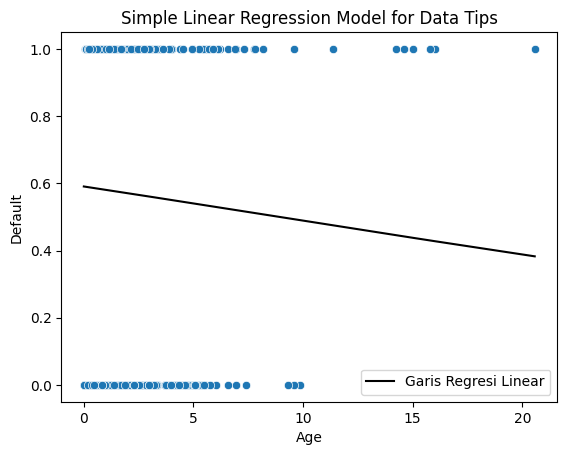

In [60]:

sns.scatterplot(data=df,x='creddebt',y='default')
plt.plot(df1['creddebt'],df1['pred'],color='black',label='Garis Regresi Linear')
plt.title('Simple Linear Regression Model for Data Tips')
plt.xlabel('Age')
plt.ylabel('Default')
plt.legend()
plt.show()

## Split Data

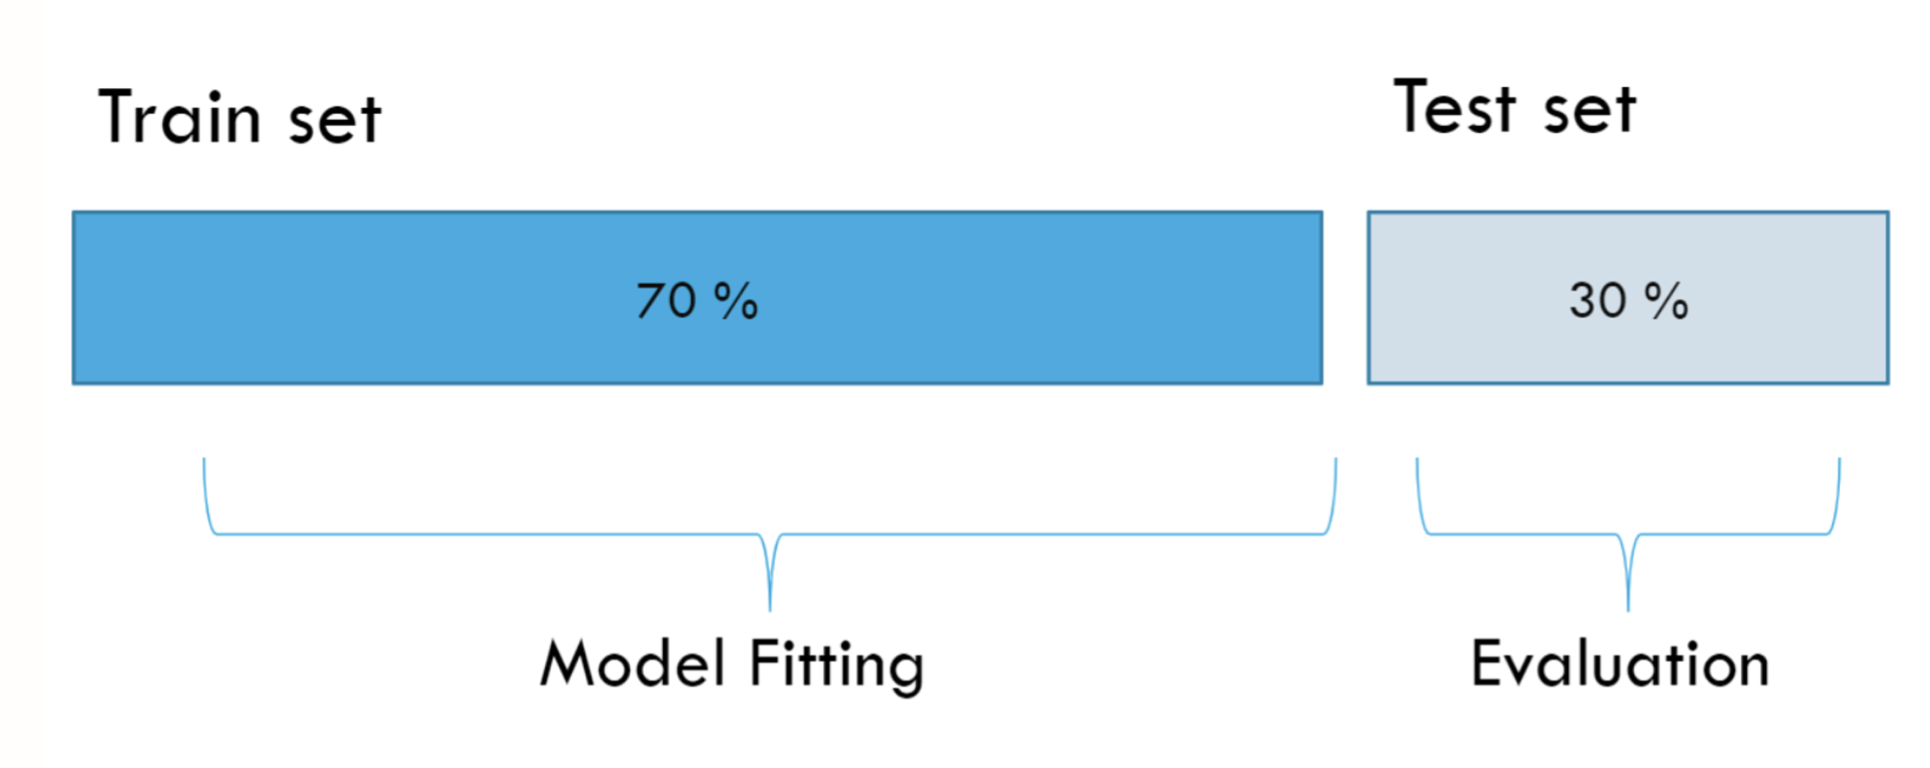

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [33]:
#create feature
X=df[['employ', 'debtinc', 'creddebt','othdebt']]

#target
y=df[['default']]

In [34]:
#split data

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, stratify=y)

In [35]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(490, 4) (210, 4) (490, 1) (210, 1)


## Modeling with Scikit Learn

In [36]:
#create model
logreg=LogisticRegression()

#fit model
logreg.fit(X_train,y_train)

#predict
y_pred=logreg.predict(X_test)

In [37]:
y_pred=pd.DataFrame(y_pred).rename(columns={0:'default_predict'})
y_pred

,default_predict
0,0
1,0
2,0
3,0
4,0
...,...
205,1
206,0
207,0
208,1


## Accuracy

In [38]:
accuracy_score(y_test,y_pred)

0.8047619047619048

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [40]:
#create feature
X=df[['employ', 'debtinc', 'creddebt','othdebt']]

#target
y=df[['default']]

In [41]:
#split data

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, stratify=y)

In [42]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(490, 4) (210, 4) (490, 1) (210, 1)


## Modeling with Scikit Learn

In [43]:
#create model
logreg=LogisticRegression()

#fit model
logreg.fit(X_train,y_train)

#predict
y_pred=logreg.predict(X_test)

In [44]:
y_pred=pd.DataFrame(y_pred).rename(columns={0:'default_predict'})
y_pred

,default_predict
0,0
1,0
2,0
3,0
4,0
...,...
205,1
206,0
207,0
208,1


## Accuracy

In [45]:
accuracy_score(y_test,y_pred)

0.8142857142857143